In [5]:
%matplotlib widget
from amftrack.pipeline.functions.post_processing.area_hulls import *
from amftrack.util.dbx import upload_folder
from amftrack.pipeline.launching.run_super import run_parallel,run_launcher
from amftrack.pipeline.launching.run_super import (
    run_launcher,
    directory_scratch,
    directory_project,
    run_parallel_stitch,
)
from amftrack.util.geometry import (
    distance_point_pixel_line,
    get_closest_line_opt,
    get_closest_lines,
    format_region,
    intersect_rectangle,
    get_overlap,
    get_bounding_box,
    expand_bounding_box,
    is_in_bounding_box,
    centered_bounding_box,
)
from amftrack.pipeline.functions.image_processing.experiment_util import (
    plot_full_image_with_features,
    get_all_edges,
    get_all_nodes,
    plot_hulls_skelet,
    plot_full,
    reconstruct_image_from_general,
)
directory_targ = directory_project
update_analysis_info(directory_targ)
analysis_info = get_analysis_info(directory_targ)
# analysis_folders = analysis_info.loc[analysis_info['unique_id'].isin(plates)]

In [4]:
select = analysis_info.loc[analysis_info['Plate']=='1048']

In [5]:
import pickle
path_exp = f'{directory_targ}{select["path_exp"].iloc[0]}'
exp = pickle.load(open(path_exp, "rb"))

In [6]:
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    load_graphs,
)

In [7]:
load_graphs(exp,range(10),post_process = True)

In [30]:
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Node,
    Edge,
    Hyphae,
)
def get_hyphae(experiment,lim_considered=1):
    tips = [node for node in experiment.nodes if len(node.ts())>0 and node.degree(node.ts()[0]) == 1
            and len(node.ts())>=lim_considered and node.ts()[-1]<10]
    problems = []
    hyphaes = []
    for i, tip in enumerate(tips):
        if i % 200 == 0:
            print(i / len(tips))
        #         tip = choice(tips)
        hyphae = Hyphae(tip)
        roots = []
        for t in tip.ts():
            if t<10:
            #             print(t,tip)
                if tip.degree(t) == 1:
                    root, edges, nodes = hyphae.get_edges(t, 200)
                    roots.append(root)
        occurence_count = Counter(roots)
        if (
            len(occurence_count.values()) >= 2
            and occurence_count.most_common(2)[0][0] != roots[0]
            and occurence_count.most_common(2)[1][1]
            / occurence_count.most_common(2)[0][1]
            >= 0.75
        ):
            problems.append(tip)
        else:
            hyphae.root = occurence_count.most_common(2)[0][0]
            hyphae.ts = hyphae.end.ts()
            hyphaes.append(hyphae)
    print(
        f"Detected problems during hyphae detection, {len(problems)} hyphaes have inconsistent root over time"
    )
    experiment.inconsistent_root = problems
    return (hyphaes, problems)

In [31]:
hyphaes, problems = get_hyphae(exp)

0.0


NameError: name 'Counter' is not defined

In [26]:
len([node for node in exp.nodes if len(node.ts())==0])

88038

In [27]:
len(exp.nodes)

374322

In [16]:
tests = [hypha for hypha in exp.hyphaes if len(hypha.end.ts())>0 and hypha.end.ts()[0]<10]

In [17]:
t= 0
ends = [hypha.end for hypha in tests]


In [20]:
[len(end.ts()) for end in ends]

[21,
 3,
 2,
 3,
 1,
 1,
 3,
 1,
 2,
 1,
 2,
 1,
 2,
 47,
 6,
 150,
 108,
 161,
 10,
 19,
 26,
 19,
 11,
 200,
 200,
 20,
 7,
 34,
 50,
 6,
 21,
 3,
 44,
 1,
 12,
 150,
 13,
 150,
 147,
 18,
 1,
 150,
 200,
 4,
 4,
 1,
 30,
 1,
 7,
 3,
 151,
 3,
 200,
 2,
 200,
 3,
 14,
 13,
 43,
 200,
 9,
 7,
 4,
 1,
 1,
 3,
 3,
 2,
 5,
 2,
 1,
 1,
 1,
 1,
 1]

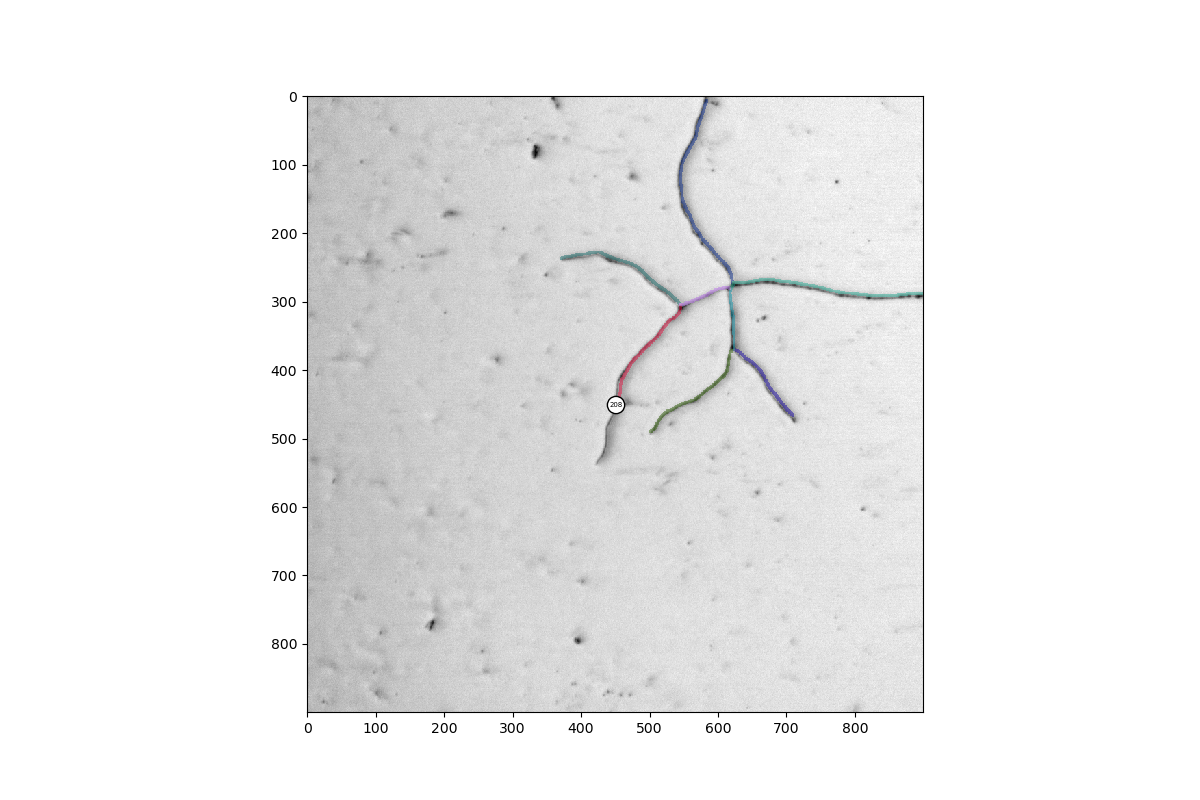

In [18]:
t = 5
exp.load_tile_information(t)
to_choose = [end for end in ends if end.is_in(t)]
# node = choice(to_choose)
# node = hypha.end
pos = node.pos(t)
window = 600

region = centered_bounding_box(pos, size=int(1.5*window))

plot_full(
    exp,
    t,
    region=region,
    downsizing=1,
    nodes=[
        node
        for node in ends
        if node.is_in(t) and np.linalg.norm(node.pos(t) - pos) <= window
    ],
    edges=get_all_edges(exp, t),
    # edges = [],
    dilation=4,
    prettify=False,
)

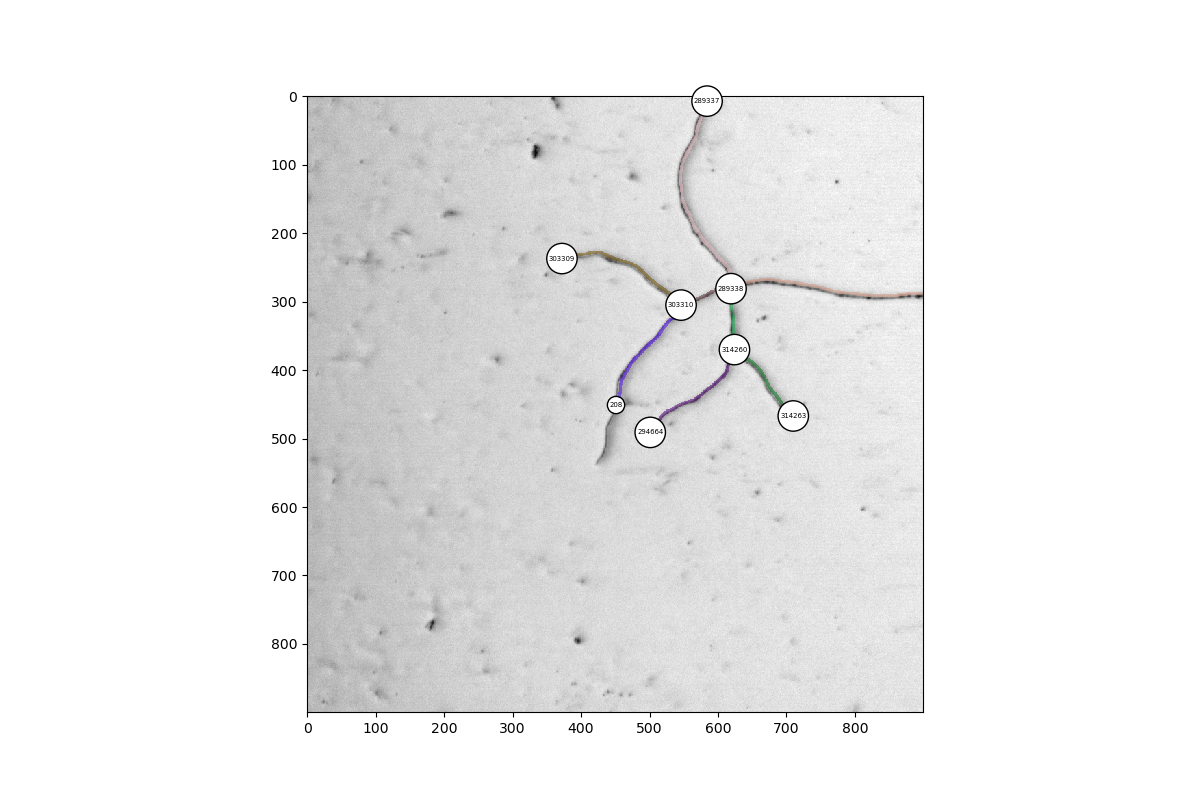

In [12]:

plot_full(
    exp,
    t,
    region=region,
    downsizing=1,
    nodes=[
        node
        for node in get_all_nodes(exp, t)
        if node.is_in(t) and np.linalg.norm(node.pos(t) - pos) <= window
    ],
    edges=get_all_edges(exp, t),
    # edges = [],
    dilation=4,
    prettify=False,
)

In [13]:
[end.label for end in ends]

[1,
 3,
 16,
 30,
 72,
 73,
 74,
 99,
 112,
 139,
 152,
 155,
 157,
 158,
 159,
 162,
 163,
 165,
 166,
 167,
 168,
 169,
 170,
 173,
 174,
 175,
 176,
 178,
 179,
 181,
 185,
 192,
 201,
 202,
 204,
 207,
 208,
 209,
 216,
 225,
 231,
 248,
 250,
 257,
 260,
 261,
 265,
 272,
 284,
 288,
 290,
 294,
 295,
 302,
 307,
 312,
 330,
 331,
 332,
 333,
 335,
 385,
 426,
 286043,
 286070,
 286080,
 286087,
 286089,
 286090,
 286097,
 286101,
 286102,
 286103,
 286104,
 286105,
 286147,
 549515,
 549521,
 549524,
 549525,
 549527,
 549534,
 549555,
 549557,
 549562,
 549563,
 549565,
 549566,
 549571,
 549572,
 549573,
 549574,
 549579,
 549581,
 549583,
 549590,
 549594,
 549603,
 549604,
 549644,
 554915,
 554917,
 554918,
 554922,
 554929,
 554931,
 554940,
 563525,
 563530,
 563546,
 563559,
 563565,
 563567,
 563580,
 563581,
 563585,
 563588,
 563589,
 563597,
 563601,
 563603,
 563609,
 563610,
 563611,
 563612,
 563613,
 563614,
 563615,
 563617,
 563621,
 563625,
 563626,
 563628,
 5

In [ ]:
time = "3:40:00"
list_f = [plot_hulls,plot_tracking]

list_args = [[]] * len(list_f)
overwrite = True
num_parallel = 30
run_parallel_post(
    "exp_plot.py",
    list_f,
    list_args,
    [directory, overwrite],
    analysis_folders,
    num_parallel,
    time,
    "global_plate_post_process",
    cpus=32,
    name_job="plotting",
    node="fat",
)

In [6]:
%load_ext autoreload
%autoreload 2
from amftrack.pipeline.functions.post_processing.exp_plot import *
from amftrack.pipeline.launching.run_super import run_parallel_post


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
update_analysis_info(directory_targ)
analysis_info = get_analysis_info(directory_targ)
analysis_folders = analysis_info.loc[analysis_info['Plate']=='52']
directory = directory_targ

In [8]:
directory

'/projects/0/einf914/data/'

In [5]:
make_hypha_track(49164)

<function amftrack.pipeline.functions.post_processing.exp_plot.make_hypha_track.<locals>.plot(exp, args=None)>

In [4]:
time = "2:00:00"
list_f = [plot_hypha_track]

list_args = [[49164]]
overwrite = True
num_parallel = 30
run_parallel_post(
    "exp_plot.py",
    list_f,
    list_args,
    [directory, overwrite],
    analysis_folders,
    num_parallel,
    time,
    "global_plate_post_process",
    cpus=32,
    name_job="plotting",
    node="fat",
)

Submitted batch job 1560516


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


In [ ]:
Node()